## US Population Growth

### (a) Import the data and create new columns
We import the US population dataset, then create:
- years since 1790
- population in millions

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the US population dataset (underscores in filename)
us = pd.read_csv("us_pop_data.csv")

# Inspect column names and preview data
print("Columns:", list(us.columns))
us.head()

Columns: ['year', 'us_pop']


,year,us_pop
0,1790,3929326
1,1800,5308483
2,1810,7239881
3,1820,9638453
4,1830,12866020


In [23]:
# Automatically detect the year column (case-insensitive search)
year_col = next((c for c in us.columns if "year" in c.lower()), None)

# Automatically detect the population column
pop_col = next((c for c in us.columns if "pop" in c.lower()), None)

# Safety check so errors are clear and helpful
if year_col is None or pop_col is None:
    raise ValueError(
        f"Column detection failed.\n"
        f"Detected year_col={year_col}, pop_col={pop_col}\n"
        f"Available columns: {list(us.columns)}"
    )

print("Using year column:", year_col)
print("Using population column:", pop_col)

# Create years since 1790
us["years_since_1790"] = us[year_col] - 1790

# Create population in millions
us["pop_millions"] = us[pop_col] / 1_000_000

# Confirm final structure
us[[year_col, pop_col, "years_since_1790", "pop_millions"]].head()

Using year column: year
Using population column: us_pop


,year,us_pop,years_since_1790,pop_millions
0,1790,3929326,0,3.929326
1,1800,5308483,10,5.308483
2,1810,7239881,20,7.239881
3,1820,9638453,30,9.638453
4,1830,12866020,40,12.866020


### (b) Plot the US population (in millions) versus the years since 1790

This scatterplot shows how the U.S. population has changed over time since 1790.

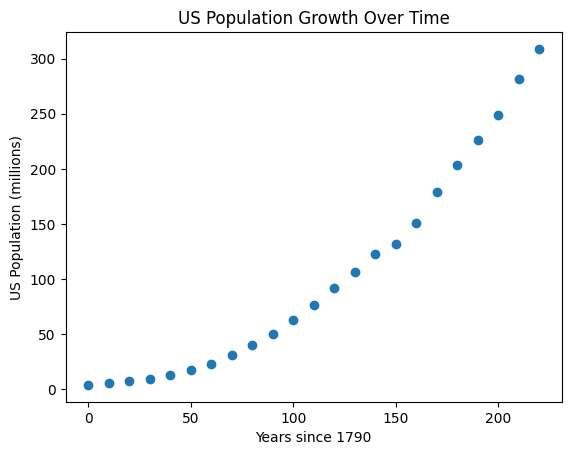

In [24]:
# Create a scatterplot of population (millions) vs years since 1790
plt.figure()
plt.scatter(us["years_since_1790"], us["pop_millions"])

# Label the axes and add a title
plt.xlabel("Years since 1790")
plt.ylabel("US Population (millions)")
plt.title("US Population Growth Over Time")

# Display the plot
plt.show()

The scatterplot shows a strong upward trend in U.S. population as time increases.
The growth does not appear perfectly linear, especially in later years, which suggests
that population growth accelerates over time rather than increasing at a constant rate.

### (c) Linear regression model predicting population using years since 1790

We create a linear regression model to predict U.S. population (in millions)
based on the number of years since 1790. We then compute the R² value to
measure how well the model fits the data.

In [25]:
# Define the input feature (years since 1790)
X = us[["years_since_1790"]]   # must be 2D for scikit-learn

# Define the target variable (population in millions)
y = us["pop_millions"]

# Create and fit the linear regression model
model_t = LinearRegression()
model_t.fit(X, y)

# Predict population values using the fitted model
y_pred_t = model_t.predict(X)

# Compute the R-squared value
r2_t = r2_score(y, y_pred_t)

# Print model details and R-squared
print("Linear Regression Model: pop_millions = b0 + b1 * t")
print("Slope (b1):", model_t.coef_[0])
print("Intercept (b0):", model_t.intercept_)
print("R^2 value:", r2_t)

Linear Regression Model: pop_millions = b0 + b1 * t
Slope (b1): 1.359624838043478
Intercept (b0): -45.567876097826044
R^2 value: 0.9192437447080442


This linear regression model shows a positive relationship between time and population.
As the number of years since 1790 increases, the predicted population also increases.
The R² value indicates how much of the variation in population is explained by this
linear relationship.

### (d) Create a new column by squaring the number of years since 1790

We create a new variable that is the square of the number of years since 1790.
This allows us to model nonlinear population growth.

In [26]:
# Create a new column that squares the years since 1790
us["years_since_1790_sq"] = us["years_since_1790"] ** 2

# Preview the relevant columns to confirm the new column was created
us[["years_since_1790", "years_since_1790_sq"]].head()

,years_since_1790,years_since_1790_sq
0,0,0
1,10,100
2,20,400
3,30,900
4,40,1600


This new squared time variable captures curvature in population growth.
It allows the regression model to represent accelerating growth over time,
which a simple linear time variable may not capture well.

### (e) Linear regression model using the square of years since 1790

We create a second linear regression model where the input feature
is the square of the number of years since 1790. We then compute
the R² value to evaluate model fit.

In [27]:
# Define the input feature using the squared time variable
X_sq = us[["years_since_1790_sq"]]   # must be 2D

# Target variable remains population in millions
y = us["pop_millions"]

# Create and fit the regression model
model_t2 = LinearRegression()
model_t2.fit(X_sq, y)

# Predict population values using the fitted model
y_pred_t2 = model_t2.predict(X_sq)

# Compute the R-squared value for this model
r2_t2 = r2_score(y, y_pred_t2)

# Print model details and R-squared
print("Linear Regression Model: pop_millions = b0 + b1 * (t^2)")
print("Slope (b1):", model_t2.coef_[0])
print("Intercept (b0):", model_t2.intercept_)
print("R^2 value:", r2_t2)

Linear Regression Model: pop_millions = b0 + b1 * (t^2)
Slope (b1): 0.006220027007947026
Intercept (b0): 1.3604104558305892
R^2 value: 0.9984915694986646


This regression model accounts for nonlinear growth by using the squared time variable.
The R² value indicates how well this model explains variation in U.S. population.
Comparing this R² to the previous model helps determine which model fits the data better.

### (f) Plot both regression models on top of the data

We plot both regression models on the same graph as the original data.
We then compare which model fits better using both the plot and the R² values.

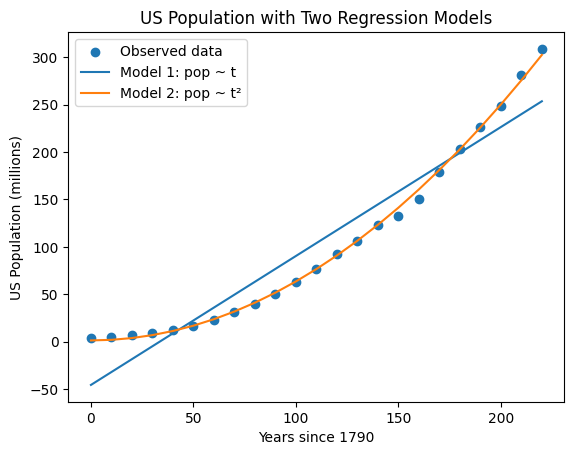

R^2 for Model 1 (pop ~ t): 0.9192437447080442
R^2 for Model 2 (pop ~ t^2): 0.9984915694986646


In [28]:
# Sort the data by years since 1790 so the lines plot smoothly
us_sorted = us.sort_values("years_since_1790")

# Create sorted input features
t_sorted = us_sorted[["years_since_1790"]]
t2_sorted = us_sorted[["years_since_1790_sq"]]

# Generate predicted values from each model
line_t = model_t.predict(t_sorted)
line_t2 = model_t2.predict(t2_sorted)

# Plot the original data
plt.figure()
plt.scatter(
    us_sorted["years_since_1790"],
    us_sorted["pop_millions"],
    label="Observed data"
)

# Plot both regression lines
plt.plot(
    us_sorted["years_since_1790"],
    line_t,
    label="Model 1: pop ~ t"
)
plt.plot(
    us_sorted["years_since_1790"],
    line_t2,
    label="Model 2: pop ~ t²"
)

# Add labels, title, and legend
plt.xlabel("Years since 1790")
plt.ylabel("US Population (millions)")
plt.title("US Population with Two Regression Models")
plt.legend()

# Show the plot
plt.show()

# Print R-squared values for direct comparison
print("R^2 for Model 1 (pop ~ t):", r2_t)
print("R^2 for Model 2 (pop ~ t^2):", r2_t2)

The model using the squared years since 1790 fits the data better.
This is apparent visually because the squared model follows the curvature
of the data more closely, especially in later years.

This conclusion is also supported by the R² values.
The model with the higher R² explains more of the variation in U.S. population,
confirming that the squared-time model provides a better fit than the simple
linear model.

## Customer Spending Data

### (a) Histogram of customer spending amounts

We create a histogram of customer spending values to examine the distribution
of the data.

In [29]:
# Load the customer spending dataset
cust = pd.read_csv("customer_spending.csv")

# Display column names and preview the data
print("Columns:", list(cust.columns))
cust.head()

Columns: ['ann_spending']


,ann_spending
0,34112
1,33266
2,36610
3,27381
4,46100


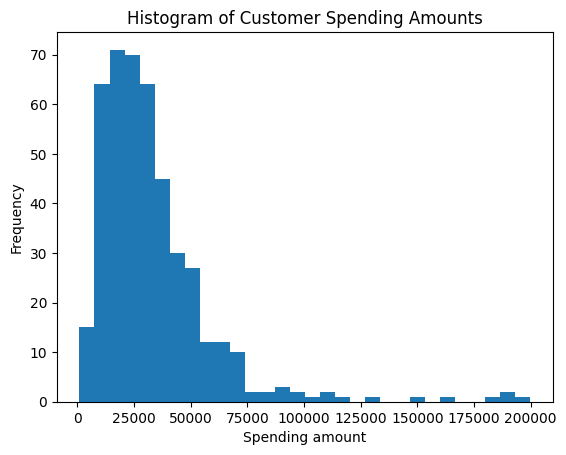

In [30]:
# Select only numeric columns (spending data is numeric)
numeric_cols = cust.select_dtypes(include="number").columns

# Combine all numeric spending values into a single array
spend = cust[numeric_cols].to_numpy().ravel()

# Plot the histogram of raw spending values
plt.figure()
plt.hist(spend, bins=30)

# Add labels and title
plt.xlabel("Spending amount")
plt.ylabel("Frequency")
plt.title("Histogram of Customer Spending Amounts")

# Display the plot
plt.show()

The histogram shows that customer spending is heavily right-skewed.
Most customers spend relatively small amounts, while a small number of
customers spend much larger amounts. These extreme values stretch the scale
of the data.

### (b) Log transformation of customer spending data

We create a new dataset by applying a log transformation to the customer
spending values. This helps reduce skewness and the influence of extreme values.

In [31]:
# Apply log(1 + x) to avoid issues with zero values
spend_log = np.log1p(spend)

# Create a full log-transformed DataFrame (useful for future modeling)
cust_log = cust.copy()
cust_log[numeric_cols] = np.log1p(cust_log[numeric_cols])

# Preview the transformed data
cust_log.head()

,ann_spending
0,10.437434
1,10.412321
2,10.508104
3,10.217641
4,10.738590


The log transformation compresses large spending values and spreads out smaller ones.
This reduces the impact of extreme outliers and makes the data more suitable for
visualization and modeling.

### (c) Histogram of the log-transformed customer spending data

We create a histogram of the log-transformed spending values to see how the
distribution changes after applying the log transformation.

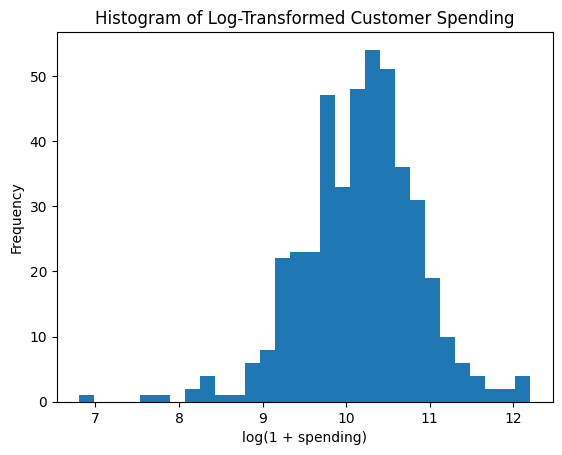

In [32]:
# Plot a histogram of the log-transformed spending values
plt.figure()
plt.hist(spend_log, bins=30)

# Add labels and title
plt.xlabel("log(1 + spending)")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Customer Spending")

# Display the plot
plt.show()

### (d) Comparison of histograms and usefulness of log transformation for modeling

The original customer spending histogram is heavily right-skewed.
Most customers spend relatively small amounts, while a small number of customers
spend very large amounts. These extreme values stretch the scale and can dominate
the analysis.

After applying a log transformation, the spending distribution becomes more
balanced and less skewed. Large values are compressed, and smaller values are spread out, making the overall structure of the data easier to see.